In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [24]:
df = pd.read_csv("./data/runtime/query-runtime-all.csv")

# Display basic information about the DataFrame
print("Shape of the DataFrame:", df.shape)
print("\nColumns in the DataFrame:", df.columns)
print("\nData types of columns:")
print(df.dtypes)

# Display summary statistics
print("\nSummary statistics:")
print(df.describe())
# Display the first few rows of the DataFrame
print("\nFirst few rows of the DataFrame:")
print(df.head())


Shape of the DataFrame: (1803, 4)

Columns in the DataFrame: Index(['query', 'runtime (ms)', 'db', 'engine'], dtype='object')

Data types of columns:
query            object
runtime (ms)    float64
db               object
engine           object
dtype: object

Summary statistics:
       runtime (ms)
count   1803.000000
mean     448.000642
std     3447.939121
min        0.166178
25%        0.627637
50%        1.147270
75%        2.873540
max    59536.843061

First few rows of the DataFrame:
                                               query  runtime (ms)        db  \
0  SELECT DISTINCT COURSEalias0.ADVISORY_REQUIREM...      8.092165  advising   
1  SELECT DISTINCT COURSEalias0.DEPARTMENT , COUR...      0.772238  advising   
2  SELECT DISTINCT COURSEalias0.DEPARTMENT , COUR...      0.530958  advising   
3  SELECT COUNT( * ) > 0 FROM COURSE AS COURSEali...     92.988014  advising   
4  SELECT DISTINCT COURSEalias0.DEPARTMENT , COUR...      1.093864  advising   

  engine  
0  mysql  
1 

In [25]:
df.head()

,query,runtime (ms),db,engine
0,SELECT DISTINCT COURSEalias0.ADVISORY_REQUIREM...,8.092165,advising,mysql
1,"SELECT DISTINCT COURSEalias0.DEPARTMENT , COUR...",0.772238,advising,mysql
2,"SELECT DISTINCT COURSEalias0.DEPARTMENT , COUR...",0.530958,advising,mysql
3,SELECT COUNT( * ) > 0 FROM COURSE AS COURSEali...,92.988014,advising,mysql
4,"SELECT DISTINCT COURSEalias0.DEPARTMENT , COUR...",1.093864,advising,mysql


In [26]:
df.shape

(1803, 4)

In [27]:
df.db.unique()

array(['advising', 'atis', 'geography', 'restaurants', 'imdb', 'car_1',
       'student_1', 'inn_1', 'formula_1'], dtype=object)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


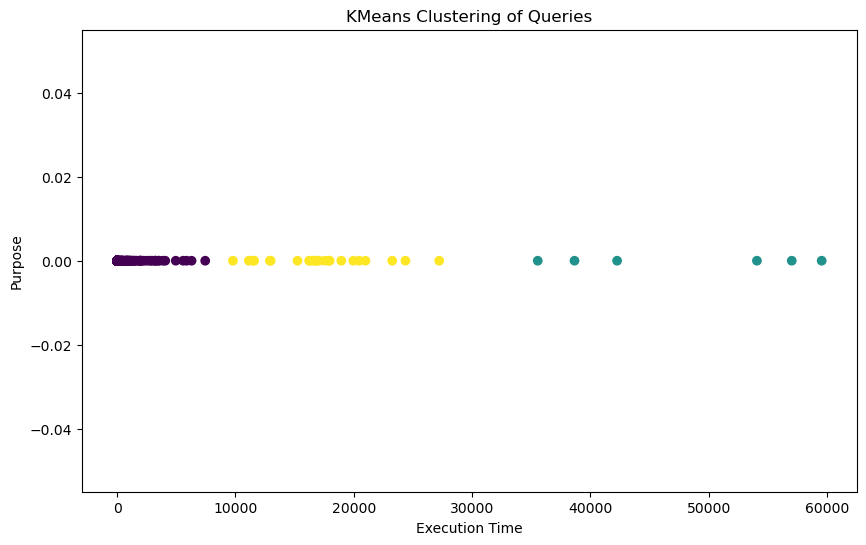

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume df is your DataFrame containing the data
X = df['runtime (ms)'].values.reshape(-1,1)

# Perform KMeans clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans_3.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime (ms)'], [0] * len(df), c=df['cluster'], cmap='viridis')
plt.title('KMeans Clustering of Queries')
plt.xlabel('Execution Time')
plt.ylabel('Purpose')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


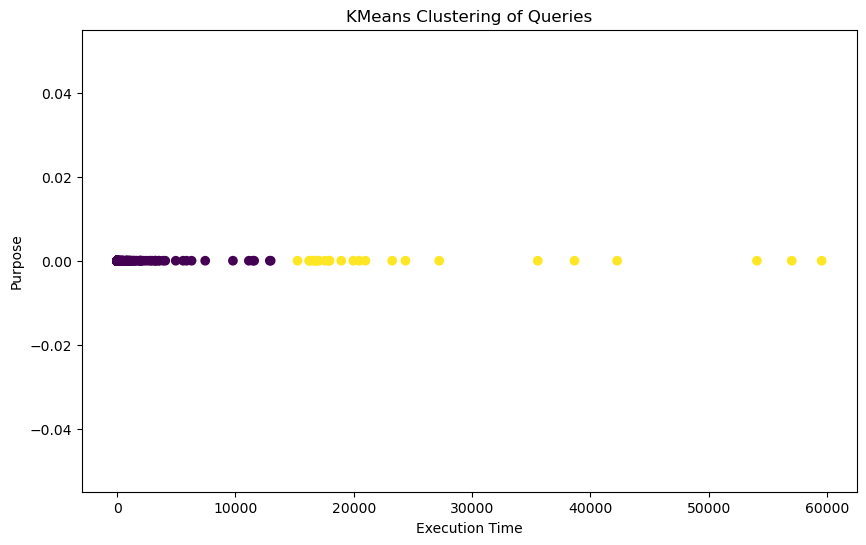

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assume df is your DataFrame containing the data
X = df['runtime (ms)'].values.reshape(-1,1)

# Perform KMeans clustering with 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
ex = kmeans_2.fit_predict(X)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime (ms)'], [0] * len(df), c=ex, cmap='viridis')
plt.title('KMeans Clustering of Queries')
plt.xlabel('Execution Time')
plt.ylabel('Purpose')
plt.show()

In [35]:
df['cluster'].value_counts()

cluster
0    1774
3      22
1       4
2       3
Name: count, dtype: int64

In [44]:
# Assume df is your DataFrame containing the data
X = df[df['cluster']==0]['runtime (ms)'].values.reshape(-1,1)
df_0 = df[df['cluster']==0]

clusters = [5,10,15,20]

for c in clusters:
    # Perform KMeans clustering with 3 clusters
    kmeans_3 = KMeans(n_clusters=c, random_state=42)
    df_0['cluster_0'] = kmeans_3.fit_predict(X)
    print(f"{c}\n")
    print(df_0['cluster_0'].value_counts())

5

cluster_0
0    1710
3      35
1      14
4      10
2       5
Name: count, dtype: int64
10

cluster_0
0    1696
5      24
2      22
4       9
9       8
7       6
1       4
3       3
6       1
8       1
Name: count, dtype: int64
15

cluster_0
0     1681
13      22
6       17
10      14
3       10
1        7
7        6
4        5
11       3
8        2
2        2
12       2
14       1
5        1
9        1
Name: count, dtype: int64
20

cluster_0
0     1672
16      24
7       13
13      11
12       8
3        8
4        7
18       6
19       4
8        4
10       3
1        3
6        2
14       2
9        2
11       1
5        1
15       1
17       1
2        1
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_10739/1565510406.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['cluster_0'] = kmeans_3.fit_predict(X)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_10739/1565510406.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


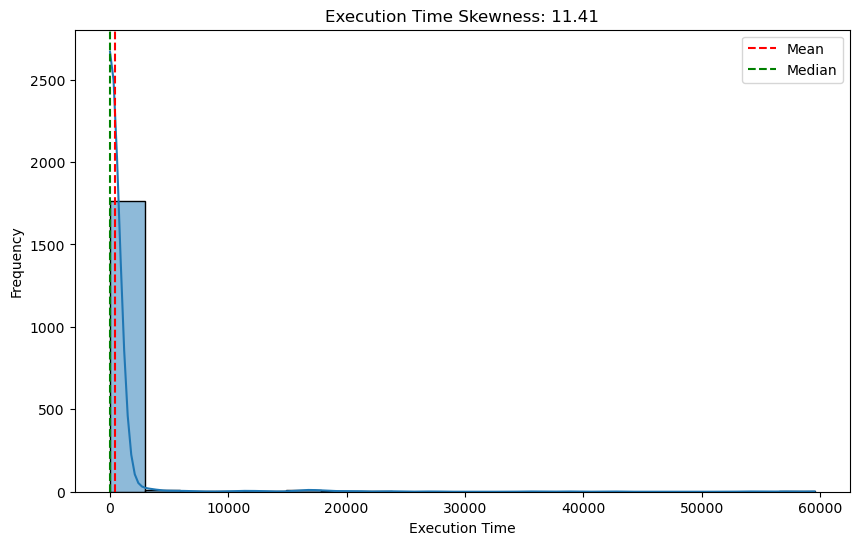

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Calculate skewness
execution_time_skewness = skew(df['runtime (ms)'])

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['runtime (ms)'], bins=20, kde=True)
plt.axvline(df['runtime (ms)'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['runtime (ms)'].median(), color='green', linestyle='--', label='Median')
plt.title(f'Execution Time Skewness: {execution_time_skewness:.2f}')
plt.xlabel('Execution Time')
plt.ylabel('Frequency')
plt.legend()
plt.show()
